In [62]:
# !pip install -U scikit-learn

In [63]:
# import kagglehub

# path = kagglehub.dataset_download("paultimothymooney/stock-market-data")

# print("Path to dataset files:", path)

In [64]:
import pandas as pd

In [65]:
path ="/Users/hassaanulhaq/.cache/kagglehub/datasets/paultimothymooney/stock-market-data/versions/74"

In [66]:
!ls -l $path/stock_market_data/nyse/csv

total 1330304
-rw-r--r--@ 1 hassaanulhaq  staff    43834 Feb 21 23:37 AAC.csv
-rw-r--r--@ 1 hassaanulhaq  staff   568285 Feb 21 23:37 AAP.csv
-rw-r--r--@ 1 hassaanulhaq  staff   322914 Feb 21 23:37 AAT.csv
-rw-r--r--@ 1 hassaanulhaq  staff   780415 Feb 21 23:37 AB.csv
-rw-r--r--@ 1 hassaanulhaq  staff   693879 Feb 21 23:37 ABC.csv
-rw-r--r--@ 1 hassaanulhaq  staff   547009 Feb 21 23:37 ABG.csv
-rw-r--r--@ 1 hassaanulhaq  staff   999567 Feb 21 23:37 ABM.csv
-rw-r--r--@ 1 hassaanulhaq  staff   494923 Feb 21 23:37 ABR.csv
-rw-r--r--@ 1 hassaanulhaq  staff  1184524 Feb 21 23:37 ABT.csv
-rw-r--r--@ 1 hassaanulhaq  staff    12455 Feb 21 23:37 ACG.csv
-rw-r--r--@ 1 hassaanulhaq  staff   740592 Feb 21 23:37 ACGL.csv
-rw-r--r--@ 1 hassaanulhaq  staff   327354 Feb 21 23:37 ACP.csv
-rw-r--r--@ 1 hassaanulhaq  staff   288203 Feb 21 23:37 ACRE.csv
-rw-r--r--@ 1 hassaanulhaq  staff   683915 Feb 21 23:37 ADC.csv
-rw-r--r--@ 1 hassaanulhaq  staff    92361 Feb 21 23:37 ADPT.csv
-rw-r--r--@ 1 hassaanulh

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# data['Returns'] = scaler.fit_transform(data['Returns'].values.reshape(-1,1))
# data.head()

In [68]:
!ls -l $path/stock_market_data/nyse/csv

total 1330304
-rw-r--r--@ 1 hassaanulhaq  staff    43834 Feb 21 23:37 AAC.csv
-rw-r--r--@ 1 hassaanulhaq  staff   568285 Feb 21 23:37 AAP.csv
-rw-r--r--@ 1 hassaanulhaq  staff   322914 Feb 21 23:37 AAT.csv
-rw-r--r--@ 1 hassaanulhaq  staff   780415 Feb 21 23:37 AB.csv
-rw-r--r--@ 1 hassaanulhaq  staff   693879 Feb 21 23:37 ABC.csv
-rw-r--r--@ 1 hassaanulhaq  staff   547009 Feb 21 23:37 ABG.csv
-rw-r--r--@ 1 hassaanulhaq  staff   999567 Feb 21 23:37 ABM.csv
-rw-r--r--@ 1 hassaanulhaq  staff   494923 Feb 21 23:37 ABR.csv
-rw-r--r--@ 1 hassaanulhaq  staff  1184524 Feb 21 23:37 ABT.csv
-rw-r--r--@ 1 hassaanulhaq  staff    12455 Feb 21 23:37 ACG.csv
-rw-r--r--@ 1 hassaanulhaq  staff   740592 Feb 21 23:37 ACGL.csv
-rw-r--r--@ 1 hassaanulhaq  staff   327354 Feb 21 23:37 ACP.csv
-rw-r--r--@ 1 hassaanulhaq  staff   288203 Feb 21 23:37 ACRE.csv
-rw-r--r--@ 1 hassaanulhaq  staff   683915 Feb 21 23:37 ADC.csv
-rw-r--r--@ 1 hassaanulhaq  staff    92361 Feb 21 23:37 ADPT.csv
-rw-r--r--@ 1 hassaanulh

In [69]:
df_aap=pd.read_csv(path+"/stock_market_data/nyse/csv/AAP.csv")

In [70]:
type(df_aap)

pandas.core.frame.DataFrame

In [71]:
type(df_aap['Date'])

pandas.core.series.Series

In [72]:
import pandas as pd

def first_day_of_month(df, date_column='Date'):
    """
    Extracts data for the first day of each month from a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame with a 'Date' column.
        date_column (str, optional): The name of the date column. Defaults to 'Date'.

    Returns:
        pd.DataFrame: A new DataFrame containing only the rows corresponding to the
                      first day of each month.
    """

    # Convert the 'Date' column to datetime objects, handling the DD-MM-YYYY format
    df[date_column] = pd.to_datetime(df[date_column], format='%d-%m-%Y')

    # Sort the dataframe by date
    df = df.sort_values(by=date_column)

    # Create a helper column for grouping
    df['year_month'] = df[date_column].dt.to_period('M')

    # Group by year and month, then take the first entry in each group
    df_first_day = df.groupby('year_month', as_index=False).first()

    # Drop the helper column
    df_first_day = df_first_day.drop('year_month', axis=1)

    return df_first_day

# Example usage (assuming your DataFrame is named df_aap):
# df_aap = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with your actual file
# df_monthly_start = first_day_of_month(df_aap)
# print(df_monthly_start)


In [73]:
df_monthly_start = first_day_of_month(df_aap)
df_monthly_start.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,2001-11-29,13.360000,13.386667,371100,14.466667,13.880000,12.583543
1,2001-12-03,13.783333,14.233333,127500,14.233333,13.783333,12.495903
2,2002-01-02,15.883333,16.166668,132300,16.166668,15.926667,14.439039
3,2002-02-01,15.650000,15.650000,9000,15.733333,15.700000,14.233548
4,2002-03-01,14.516667,14.933333,219000,14.933333,14.633333,13.266511


In [74]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Change in the stock price of Apple over the years')

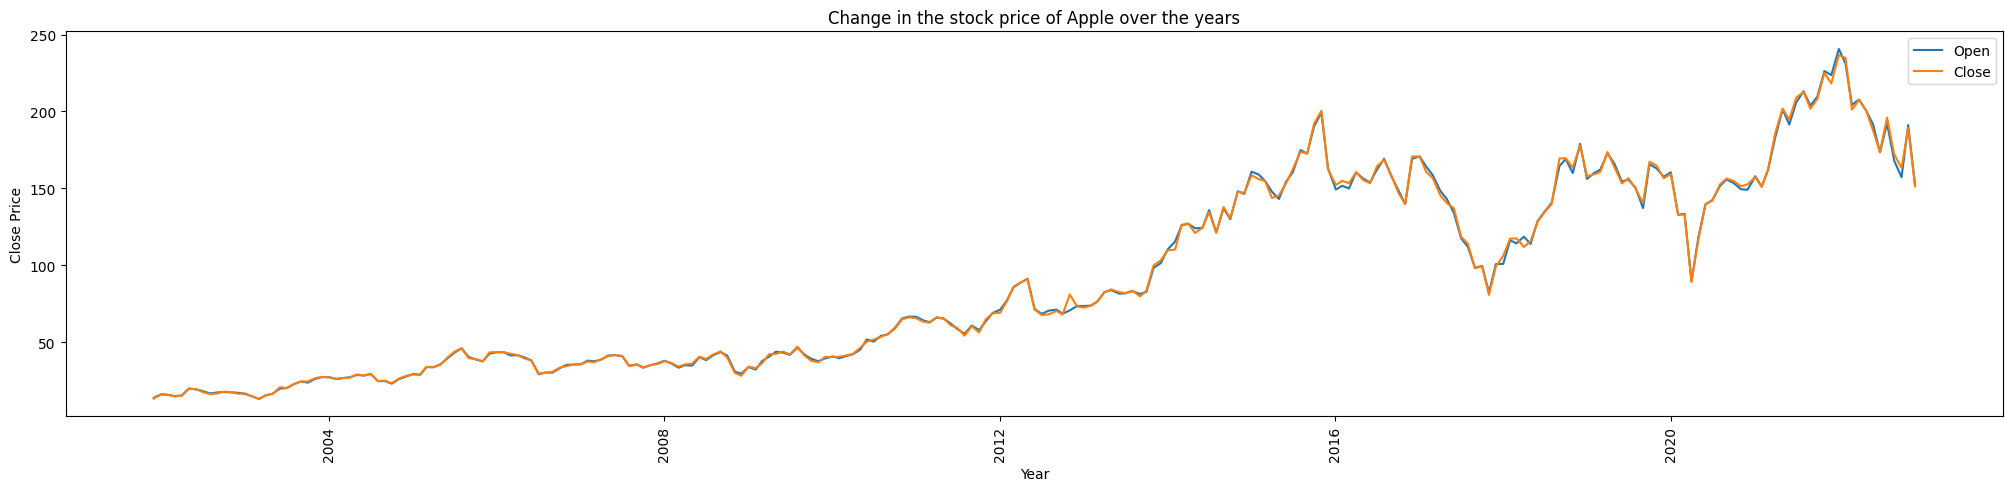

In [75]:
plt.figure(figsize=(25,5))
plt.plot(df_monthly_start['Date'],df_monthly_start['Open'], label='Open')
plt.plot(df_monthly_start['Date'],df_monthly_start['Close'], label='Close')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Close Price')
plt.legend()
plt.title('Change in the stock price of Apple over the years')

In [76]:
df_monthly_start.isna().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

In [77]:
df_monthly_start['Percent Change'] = df_monthly_start['Close'].pct_change()

In [78]:
df_monthly_start[df_monthly_start['Percent Change']==0.0]

,Date,Low,Open,Volume,High,Close,Adjusted Close,Percent Change
98,2010-01-04,40.360001,40.700001,1701700,41.040001,40.380001,37.555939,0.0


<Axes: xlabel='Date', ylabel='Rolling Average'>

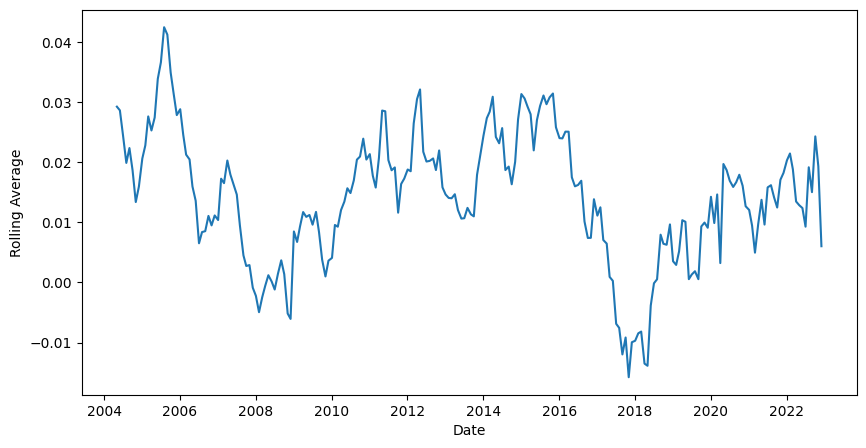

In [79]:
import seaborn as sns
df_monthly_start['Rolling Average'] = df_monthly_start['Percent Change'].rolling(window=30).mean()

plt.figure(figsize=(10,5))

''' Creating a line plot using the 'Month Starting' column as the x-axis 
and the 'Rolling Average' column as the y-axis'''

sns.lineplot(x='Date', y='Rolling Average', data=df_monthly_start)

<Axes: >

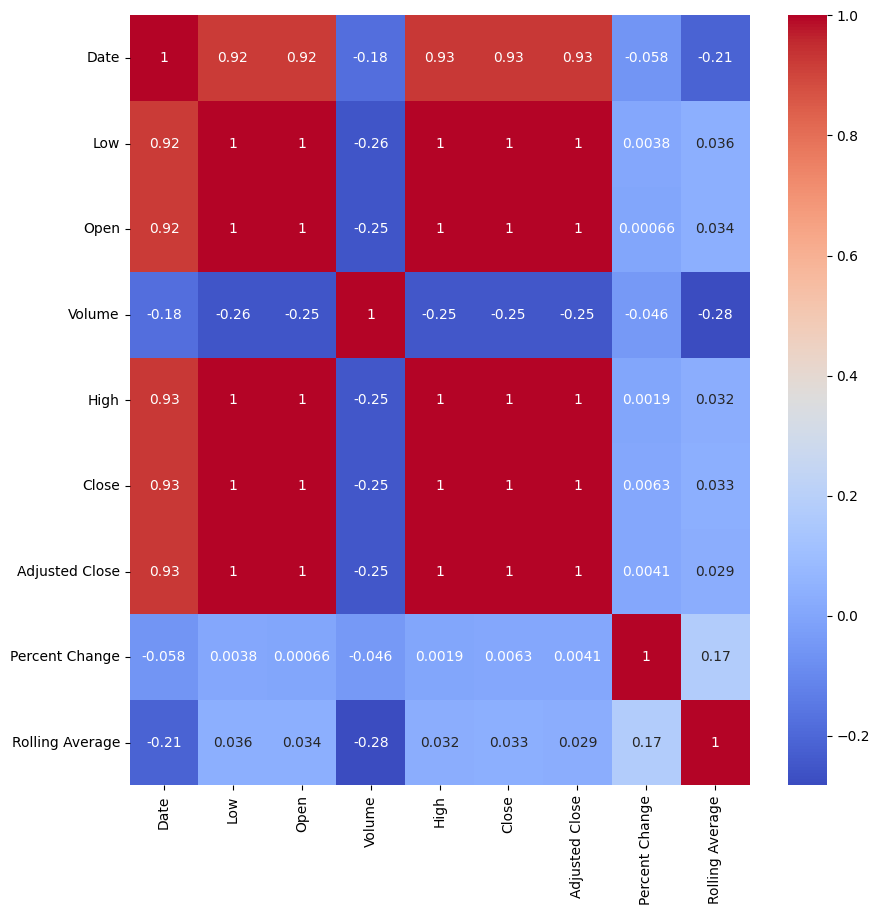

In [80]:
corr = df_monthly_start.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## ML Part

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_monthly_start['Percent Change'] = scaler.fit_transform(df_monthly_start['Percent Change'].values.reshape(-1,1))
df_monthly_start.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Percent Change,Rolling Average
0,2001-11-29,13.360000,13.386667,371100,14.466667,13.880000,12.583543,NaN,NaN
1,2001-12-03,13.783333,14.233333,127500,14.233333,13.783333,12.495903,-0.228054,NaN
2,2002-01-02,15.883333,16.166668,132300,16.166668,15.926667,14.439039,1.579104,NaN
3,2002-02-01,15.650000,15.650000,9000,15.733333,15.700000,14.233548,-0.308892,NaN
4,2002-03-01,14.516667,14.933333,219000,14.933333,14.633333,13.266511,-0.906308,NaN


##### Some shady imputation

In [82]:
df_monthly_start['Percent Change'] = df_monthly_start['Percent Change'].fillna(df_monthly_start['Percent Change'].mean())
df_monthly_start['Rolling Average'] = df_monthly_start['Rolling Average'].fillna(df_monthly_start['Rolling Average'].mean())

In [83]:
df_monthly_start.isna().sum()

Date               0
Low                0
Open               0
Volume             0
High               0
Close              0
Adjusted Close     0
Percent Change     0
Rolling Average    0
dtype: int64

In [84]:
type(df_monthly_start['Date'])


pandas.core.series.Series

In [85]:
# df_monthly_start['Date'] = pd.to_datetime(df_monthly_start['Date'])

In [86]:
type(df_monthly_start['Date'])

pandas.core.series.Series

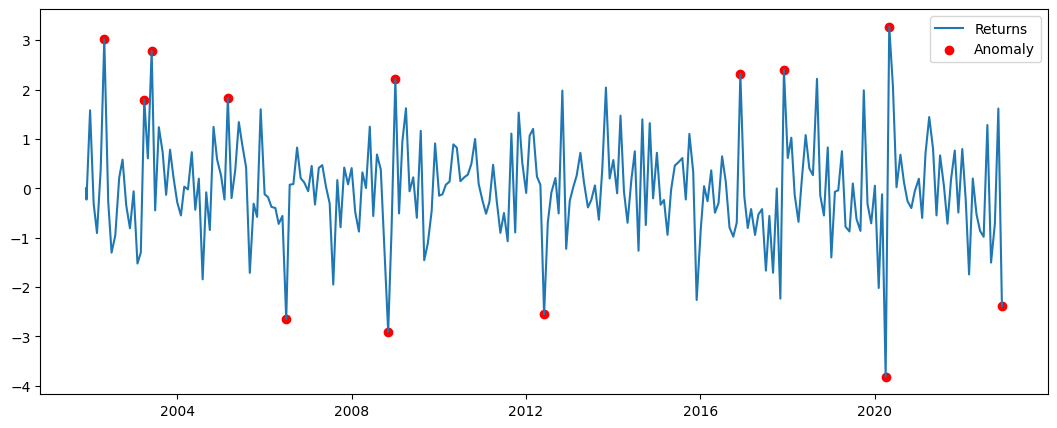

In [90]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05)
model.fit(df_monthly_start[['Percent Change']])
df_monthly_start['Anomaly'] = model.predict(df_monthly_start[['Percent Change']])
df_monthly_start['Anomaly'] = df_monthly_start['Anomaly'].map({1: 0, -1: 1})    # 1 is normal, 0 is anomaly


# Ploting the results
plt.figure(figsize=(13,5))
plt.plot(df_monthly_start['Date'], df_monthly_start['Percent Change'], label='Returns')
plt.scatter(df_monthly_start[df_monthly_start['Anomaly'] == 1]['Date'], df_monthly_start[df_monthly_start['Anomaly'] == 1]['Percent Change'], color='red')
plt.legend(['Returns', 'Anomaly'])
plt.show()

In [91]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import pandas as pd

# Initialize plotly for offline use
init_notebook_mode(connected=True)

# Assuming df_monthly_start is your DataFrame
# Convert index to datetime if it's not already
df_monthly_start.index = pd.to_datetime(df_monthly_start.index)

# Create the line plot
trace1 = go.Scatter(
    x=df_monthly_start['Date'], 
    y=df_monthly_start['Percent Change'],
    mode='lines',
    name='Returns'
)

# Create scatter plot for anomalies
anomalies = df_monthly_start[df_monthly_start['Anomaly'] == 1]
trace2 = go.Scatter(
    x=anomalies['Date'], 
    y=anomalies['Percent Change'],
    mode='markers',
    name='Anomaly',
    marker=dict(color='red', size=10)
)

# Combine the traces
data = [trace1, trace2]

# Define the layout
layout = go.Layout(
    title='Returns Over Time with Anomalies',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Percent Change'),
    hovermode='closest'
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot
iplot(fig)
